#### 1. Importing the Libraries

In [39]:
import re
import nltk
import spacy
import pandas as pd
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nlp = spacy.load('en_core_web_lg')
nltk.download('stopwords')

ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ritikagupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### 2. Creating the Dataset

In [18]:
true = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")

# Creating the column 'fake'
true['fake'] = 0
fake['fake'] = 1

# Combining both dataset
df = pd.DataFrame()
df = true.append(fake)

del true
del fake

df = df.drop(columns = ['date','subject','text'])
# Shuffle the dataset
df = df.sample(frac=1)
df = df.head(4000)

# Take the title column and convert it into numpy array
titles = np.array(df['title'])

/var/folders/cy/hd9k90656lx_zrdft5_wmllh0000gn/T/ipykernel_45925/808718421.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = true.append(fake)


#### 3. Data Preprocessing

In [31]:
corpus = []
for i in tqdm(range(len(titles))):
    #news = re.sub(['[^a-zA-Z]',' '],titles[i])
    # Converting into lowercase and splitting the news
    news = titles[i].lower().split()
    news = ' '.join([ps.stem(word) for word in news if not word in stopwords.words('english')])
    news = nlp(news).vector
    corpus.append(news)

X = np.array(corpus)

X_train = X[:3500]
X_test  = X[3500:]
y_train = df['fake'][:3500]
y_test  = df['fake'][3500:]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:30<00:00, 132.38it/s]


In [32]:
X_train.shape

(3500, 300)

#### 4. Training the Classifier

In [35]:
classifier = LogisticRegression(random_state=1)
classifier.fit(X_train,y_train)

/Users/ritikagupta/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

#### 5. Model Evaluation

In [36]:
y_pred = classifier.predict(X_test)

In [42]:
cm = confusion_matrix(y_test,y_pred)
print('Accuracy:',accuracy_score(y_test,y_pred)*100)

Accuracy: 94.8


<Axes: >

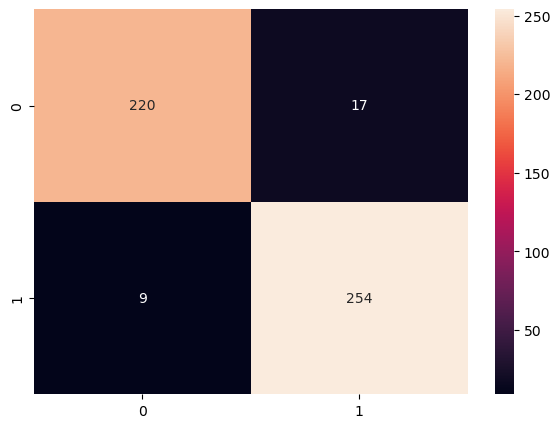

In [45]:
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True,fmt='d')